In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
dataset = pd.read_csv('/content/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Exploratory Data Analysis

In [4]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Searching Missing Values

In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Distribution of Age

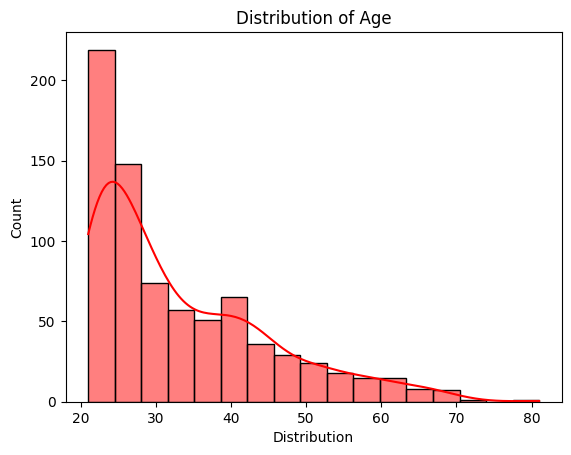

In [16]:
sns.histplot(dataset['Age'], kde=True, color='r')
plt.title('Distribution of Age')
plt.xlabel('Distribution')
plt.show()

Distribution of all columns

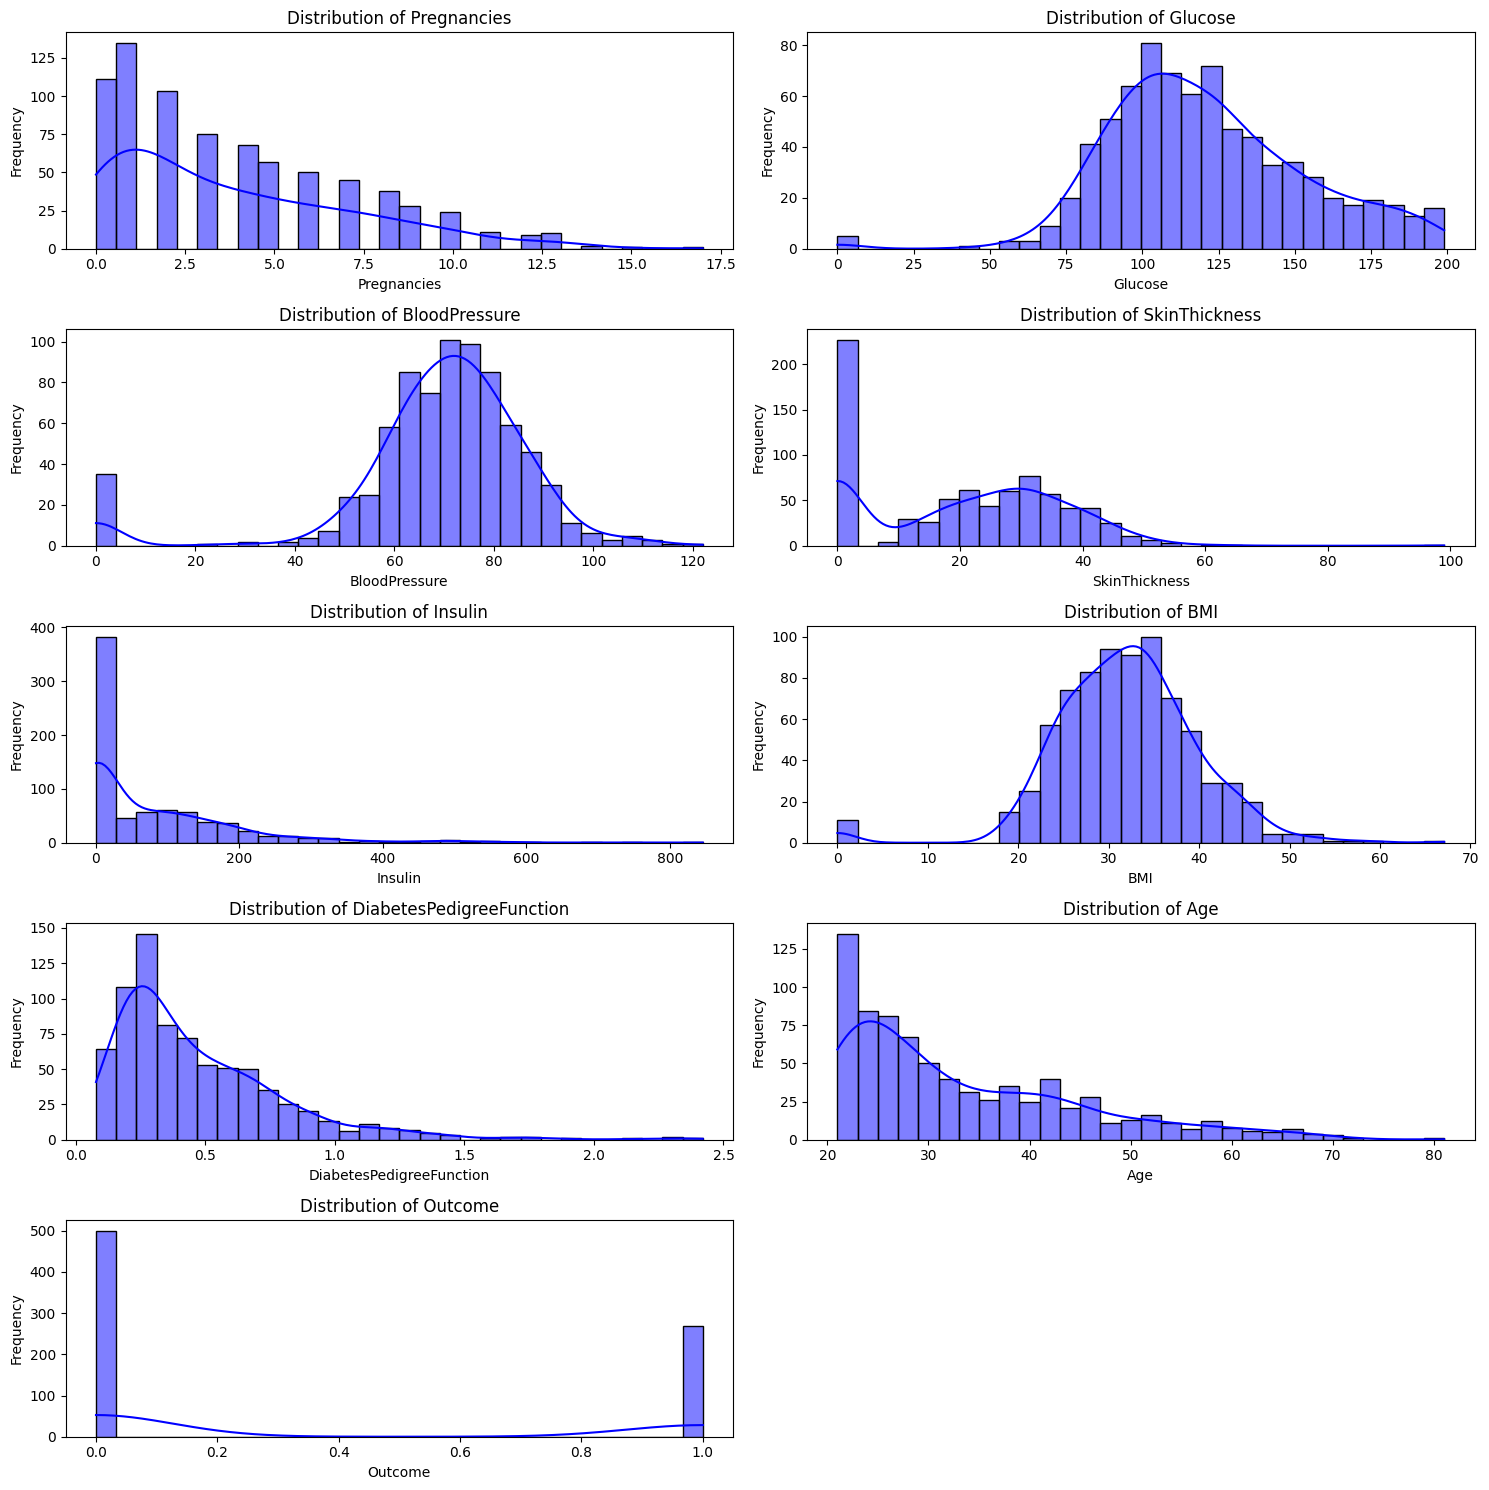

In [23]:
plt.figure(figsize=(15,15))
for i,j in enumerate(dataset, 1):
  plt.subplot(5, 2, i)
  sns.histplot(dataset[j], bins=30, kde=True, color='b')
  plt.title(f'Distribution of {j}')
  plt.xlabel(j)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-30-434324884b89>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dataset, x='Outcome', y='BloodPressure', palette="plasma")


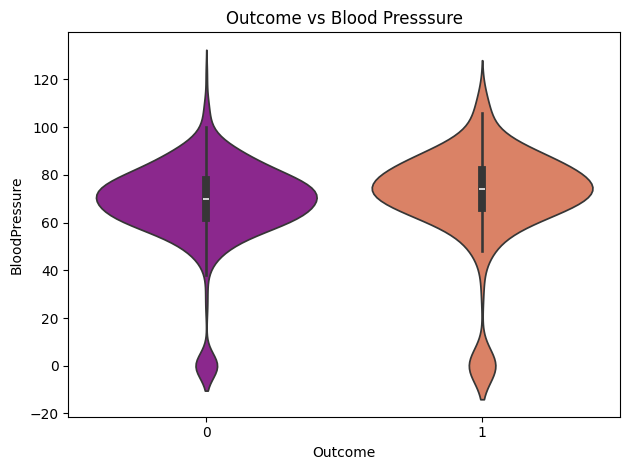

In [30]:
sns.violinplot(data=dataset, x='Outcome', y='BloodPressure', palette="plasma")
plt.title('Outcome vs Blood Presssure')
plt.tight_layout()
plt.show()

Mean Values of Columns for Diabetic and Non-Diabetic people

In [26]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Lets run Regression analysis using svm and Linear Regeressor

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

Removing Target Variable from Features

In [35]:
x=dataset.drop(columns = 'Outcome')
y=dataset['Outcome']

Scaling Data to Normal Distribution AND Seperating Training Data and Test Data

In [38]:
scaler = StandardScaler()
scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

For Linear Regression

In [40]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

For SVM

In [39]:
svmreg = svm.SVC(kernel='poly')
svmreg.fit(x_train,y_train)

SVC(kernel='poly')

Score Check

In [44]:
linreg.score(x_test, y_test)

0.35920221456235735

In [43]:
svmreg.score(x_test, y_test)

0.7792207792207793

Finding Mean Absolute Error

In [45]:
y_predict_linreg=linreg.predict(x_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict_linreg)

0.3071804531440155

In [46]:
y_predict_svmreg=svmreg.predict(x_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict_svmreg)

0.22077922077922077